# Quarto Projeto

O dataset utilizado representa um site de vendas de carros, onde cada linha representa um carro que está sendo vendido. Alguns desses carros foram vendidos, e outros não, essa informação é representada pela coluna "sold". Temos 3 features sobre esses carros, que podem refletir na venda ou nao venda do mesmo. Elas são representadas pelas colunas "mileage_per_year", "model_year" e "price"

#### Configurando o dataset

In [76]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"

dataset = pd.read_csv(uri)
dataset.head()


,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


Renomeando as colunas

In [77]:
rename_map = {
  "mileage_per_year": "milhas_por_ano",
  "model_year": "ano_do_modelo",
  "price": "preco",
  "sold": "vendido"
}

dataset = dataset.rename(columns=rename_map)
dataset.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


Swaping da coluna "vendido"

In [78]:
swap = {
  "no": 0,
  "yes": 1
}

dataset["vendido"] = dataset.vendido.map(swap)
dataset.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


Criando a feature "idade_do_modelo"

In [79]:
from datetime import datetime

ano_atual = datetime.today().year
dataset["idade_do_modelo"] = ano_atual - dataset.ano_do_modelo 
dataset.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


Criando a feature "km por ano"

In [80]:
# 1 milha equivale a 1.60934 km

dataset["km_por_ano"] = dataset.milhas_por_ano * 1.60934
dataset.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


Removendo colunas que não utilizaremos

In [81]:
useless_columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"] 
dataset = dataset.drop(columns=useless_columns)
dataset.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


Separando features das labels

In [82]:
x = dataset[["preco", "idade_do_modelo", "km_por_ano"]]
y = dataset["vendido"]
x.head()

,preco,idade_do_modelo,km_por_ano
0,30941.02,23,35085.22134
1,40557.96,25,12622.05362
2,89627.50,17,11440.79806
3,95276.14,8,43167.32682
4,117384.68,9,12770.11290


#### Separando treino e teste

In [83]:
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 5
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, test_size=0.25)
print(f"Treino com {len(train_x)} elementos e teste com {len(test_x)}")

Treino com 7500 elementos e teste com 2500


#### Pré-processamento

Normalizando os dados com scaler

In [84]:
from sklearn.preprocessing import StandardScaler

# O StandardScaler tira a média e divide pelo desvio padrão
scaler = StandardScaler()

raw_train_x = train_x
raw_test_x = test_x

scaler.fit(raw_train_x)

train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

#### Importando o modelo

In [85]:
from sklearn.svm import SVC

model = SVC(gamma="auto")

#### Treinando o modelo

In [86]:
model.fit(train_x, train_y)

SVC(gamma='auto')

#### Validando o modelo

In [87]:
from sklearn.metrics import accuracy_score

predictions = model.predict(test_x)
accuracy = accuracy_score(test_y, predictions) * 100

print(f"Accuracy of model in {len(test_y)} elements of data test was {accuracy:.2f}%")

Accuracy of model in 2500 elements of data test was 77.48%


#### Definindo baseline

Dummy Stratified

In [88]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy="stratified")
dummy_stratified.fit(train_x, train_y)

baseline = dummy_stratified.predict(test_x)
acc_dummy_stratified = accuracy_score(test_y, baseline) * 100

print(f"Acc of dummy_stratified in {len(test_y)} elements of data test was {acc_dummy_stratified:.2f}%")

Acc of dummy_stratified in 2500 elements of data test was 52.44%


Dummy most frequent

In [89]:
dummy_mf = DummyClassifier(strategy="most_frequent")
dummy_mf.fit(train_x, train_y)

baseline = dummy_mf.predict(test_x)
acc_dummy_mf = accuracy_score(test_y, baseline) * 100

print(f"Acc of dummy_mf in {len(test_y)} elements of data test was {acc_dummy_mf:.2f}%")

Acc of dummy_mf in 2500 elements of data test was 58.00%


Dummy constant

In [90]:
# Não precisamos importar o accuracy_score, nem fazer o predict, o método score já faz isso

dummy_constant = DummyClassifier(strategy="constant", constant=0)
dummy_constant.fit(train_x, train_y)

acc_dummy_constant = dummy_constant.score(test_x, test_y) * 100

print(f"Acc of dummy_mf in {len(test_y)} elements of data test was {acc_dummy_constant:.2f}%")

Acc of dummy_mf in 2500 elements of data test was 42.00%


## Decision Tree Classifier

Queremos um classificador que "explique" como uma decisão está sendo tomada, e para isso as árvores de decisão são muito boas

In [91]:
from sklearn.tree import DecisionTreeClassifier

#max_depth é a profundidade máxima da árvore
model = DecisionTreeClassifier(max_depth=3)

# As árvores de decisão não precisam de um Scaler nos dados, diferentemente dos SVM.
model.fit(raw_train_x, train_y)
accuracy_DTC = model.score(raw_test_x, test_y) * 100

print(f"Accuracy of DecisionTree in {len(test_y)} elements was {accuracy_DTC:.2f}%")


Accuracy of DecisionTree in 2500 elements was 79.28%


Visualizando decisões

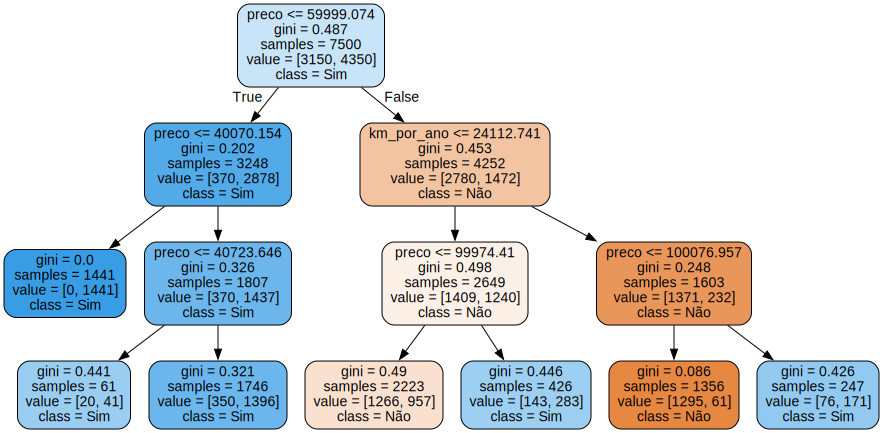

In [92]:
from sklearn.tree import export_graphviz
import graphviz


features = x.columns
# devolve um formato de um gráfico
dot_data = export_graphviz(model, 
                          out_file=None, 
                          feature_names=features,
                          filled=True,
                          rounded=True,
                          class_names=["Não", "Sim"]
                          )
grafico = graphviz.Source(dot_data)

grafico

In [93]:
# Vermelho é uma classificação, azul é outra, e branco é uma incerteza